In [1]:
import numpy as np
import matplotlib.pyplot as plt

xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(X**2 + Y**2)
fig,ax=plt.subplots(1,1)
fig.set_size_inches(10, 10)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
#ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()

<Figure size 1000x1000 with 2 Axes>

# Physically-realistic domain viz

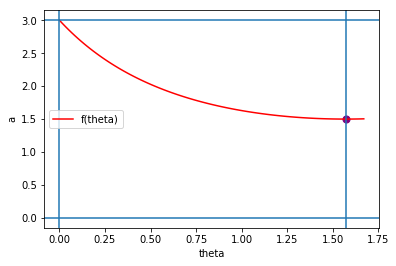

In [2]:


W = 3
domain = np.linspace(0,np.pi/2+.1,100)
f = W/(1+np.sin(domain))
plt.plot(domain, f, '-', label="f(theta)",  color="red")


plt.axvline(x=0)
plt.axvline(x=np.pi/2)
plt.axhline(y=3)
plt.axhline(y=0)

plt.scatter(np.pi/2, 1.5, s=50, color="purple")
plt.xlabel('theta')
plt.ylabel('a')
plt.legend()





# Contour Plot

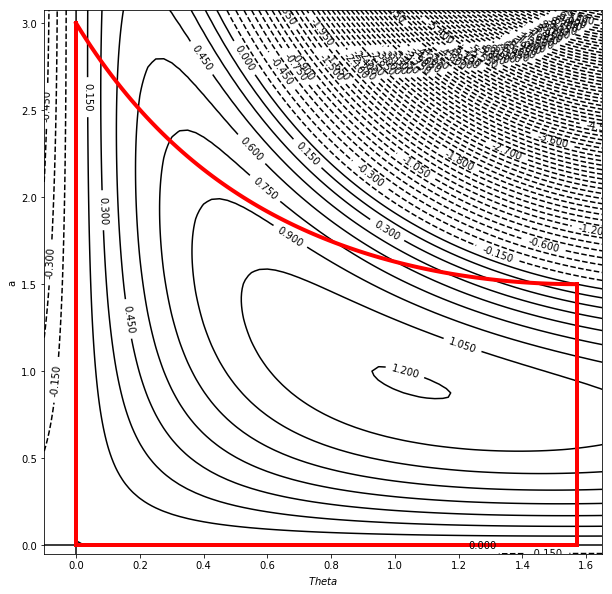

In [3]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

W = 3
delta = 0.025
a = np.arange(-.05, W+.1, delta) 
theta = np.arange(-.1, np.pi/2+.1, delta)
a, theta = np.meshgrid(a, theta)
# Z1 = np.exp(-X**2 - Y**2)
# Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
# Z = (Z1 - Z2) * 2
A = 1/2*a*np.sin(theta)*(2*W-2*a*np.sin(theta)-2*a+a*np.cos(theta))


fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

levels = np.arange(-9,2,0.25)
CS = ax.contour(theta, a, A, 100, colors='k')
ax.clabel(CS, inline=1, fontsize=10)
ax.set_xlabel('$Theta$')
ax.set_ylabel('a')


domain = np.linspace(0,np.pi/2,100)
f = W/(1+np.sin(domain))
plt.plot(domain, f, '-r',linewidth=4)

# domain = np.linspace(np.pi/2,np.pi)
# f = W/(1+np.sin(domain)-np.cos(domain))
# plt.plot(domain, f, '-r', linewidth=4)

plt.plot([0,0],[3,0], '-r',linewidth=4.)
plt.plot([0,np.pi/2],[0,0], '-r',linewidth=4.)
plt.plot([np.pi/2,np.pi/2],[0,1.5], '-r',linewidth=4.)


# Gradient descent 

In [4]:
import numpy as np 
# exact line search with bisection
W = 3 # the parameter

def sin(x):
    return np.sin(x)
def cos(x):
    return np.cos(x)

def minus_A(x):
    """
    Function to compute -A(theta, a), the negated cross-sectional area
    
    Inputs:
    - x: numpy array of two numbers
    """
    theta, a = x[0], x[1]
    return -1/2*a*sin(theta)*(2*W-2*a*sin(theta)-2*a+a*cos(theta))

def grad_minus_A(x):
    """
    Compute the gradient of -A at x=(theta,a). The formula is from using SageMath. 
    
    Inputs:
    - x: numpy array of two numbers
    """
    theta, a = x[0], x[1]
    return np.array([-1/2*(a*cos(theta)-2*a*sin(theta)-2*a+6)*a*cos(theta)+1/2*(2*a*cos(theta)+a*sin(theta))*a*sin(theta), 
            -1/2*a*(cos(theta)-2*sin(theta)-2)*sin(theta)-1/2*(a*cos(theta) - 2*a*sin(theta) - 2*a + 6)*sin(theta)])

def h_prime_fn(alpha, x, d):
    """
    Compute h'(alpha) as the dot product of gradient of -A at (x + alpha*d) and d.
    
    Inputs:
    - alpha: float
    - x, d: numpy arrays of 2 numbers
    """
    _temp_term = x+alpha*d
    return np.dot(grad_minus_A(_temp_term), d)

def gradient_descent_solver(f, grad_f, x, epsilon1, epsilon2):
    """
    Inputs:
    
        - f: objective function to minimize
        - grad_f: function to compute the gradient of f
        - x: initialization, a numpy array
        - epsilon1: stopping criteria for gradient descent. Stops when ||g||<epsilon1,
        where g is the gradient 
        - epsilon2: stopping criteria for bisection search in exactline search. Stops
        when |h'(alpha)| < epsilon
    
    Outputs:
    A dictionary `out` with:
        - k: int, the iteration number (1, 2, ...)
        - x: numpy array of the current (theta, a)
        - norm_d: float, the norm of the gradient at the current point
        - f: float, the value of f evaluated at x 
    """
    
    grad = grad_f(x)
    out = {'k': [1], 'x': np.array(x), 'norm_d': [], 'f': []} 
    i = 0
    # we stop when the norm of the gradient at the point is small enough
    while np.linalg.norm(grad, ord=2) > epsilon1:
        out['norm_d'].append(np.linalg.norm(grad, ord=2))
        out['f'].append(f(x))
        i += 1
        d = -grad 

        # Let h(alpha) = f(x+alpha*d)
        # We try to find alpha such that h(alpha) is minimized. Therefore, the goal is to find
        # alpha such that h'(alpha) = 0 
        # We will do that by bisection 
        
        # We first choose an alpha_hi value and h'(alpha_hi)>0
        # initiate alpha_hi
        alpha_hi = 1e-3
        # continually double alpha_hi until h'(alpha_hi) >0 
        while h_prime_fn(alpha_hi, x, d) <= 0:
            alpha_hi = 2*alpha_hi
            
        alpha_lo = 0 
        # compute the midpoint
        alpha = (alpha_lo + alpha_hi)/2
        # compute h'(alpha)
        h_prime = h_prime_fn(alpha, x, d)
        # We stop searching for alpha when |h'(alpha)| is small enough
        while abs(h_prime) > epsilon2:
            if h_prime > 0:
                alpha_hi = alpha
            elif h_prime < 0: 
                alpha_lo = alpha
            # update alpha and h'
            alpha = (alpha_lo + alpha_hi)/2
            h_prime = h_prime_fn(alpha, x, d)

        # after finding alpha, we update x, moving along the d direction.
        x = x + alpha*d 
        out['k'].append(out['k'][-1]+1)
        out['x'] = np.vstack((out['x'], x))
        grad = grad_f(x)
    out['norm_d'].append(np.linalg.norm(grad, ord=2))
    out['f'].append(f(x))
    return out

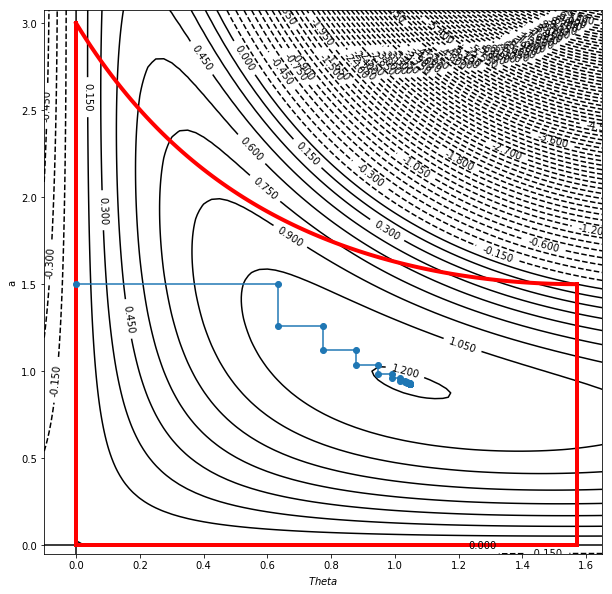

In [5]:
# maximizing A is equivalent to minimizing -A
out = gradient_descent_solver(minus_A, grad_minus_A, x=np.array([0,1.5]), epsilon1=1e-6, epsilon2=1e-13)

# plot the convergence on the contour plot
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

W = 3
delta = 0.025
a = np.arange(-.05, W+.1, delta) 
theta = np.arange(-.1, np.pi/2+.1, delta)
a, theta = np.meshgrid(a, theta)

A = 1/2*a*np.sin(theta)*(2*W-2*a*np.sin(theta)-2*a+a*np.cos(theta))


fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

levels = np.arange(-9,2,0.25)
CS = ax.contour(theta, a, A, 100, colors='k')
ax.clabel(CS, inline=1, fontsize=10)
ax.set_xlabel('$Theta$')
ax.set_ylabel('a')


domain = np.linspace(0,np.pi/2,100)
f = W/(1+np.sin(domain))
plt.plot(domain, f, '-r',linewidth=4)

plt.plot([0,0],[3,0], '-r',linewidth=4.)
plt.plot([0,np.pi/2],[0,0], '-r',linewidth=4.)
plt.plot([np.pi/2,np.pi/2],[0,1.5], '-r',linewidth=4.)

plt.plot(out['x'][:,0], out['x'][:,1], '-o')

# Table of convergence 

In [6]:
import pandas as pd

data = out
data['theta'], data['a'] = list(out['x'][:,0]), list(out['x'][:,1])
data['A'] = list(-np.array(data['f']))
del data['x'], data['f']

df = pd.DataFrame(data)
df

,k,norm_d,theta,a,A
0,1,3.375000e+00,0.000000,1.500000,0.000000
1,2,3.371201e-01,0.634118,1.500000,1.080211
2,3,4.858194e-01,0.634118,1.260854,1.120522
3,4,2.654409e-01,0.773031,1.260854,1.153355
4,5,2.702426e-01,0.773031,1.119061,1.172174
5,6,1.874790e-01,0.877242,1.119061,1.185901
6,7,1.491810e-01,0.877242,1.034953,1.193785
7,8,1.199713e-01,0.948098,1.034953,1.198968
8,9,8.097943e-02,0.948098,0.986392,1.201881
9,10,7.093561e-02,0.992033,0.986392,1.203637
